<a href="https://colab.research.google.com/github/ThiagoBalbo16/Course-DDS4-FLAI/blob/main/Class_12_Hyperparameters_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course: Curso Dominando Data Science [FLAI] \\
Description: Hyperparameter Tuning \\
Author: FLAI \\
Adapted by : Thiago Balbo Batista \\
Year: 2021

#### Importing the Data:

In [2]:
# Import the dataset via github:

import pandas as pd
url = 'https://raw.githubusercontent.com/ThiagoBalbo16/Course-DDS4-FLAI/main/train.csv'
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Exploratory Analysis

     |████████████████████████████████| 15.1 MB 166 kB/s 


                                             |          | [  0%]   00:00 -> (? left)


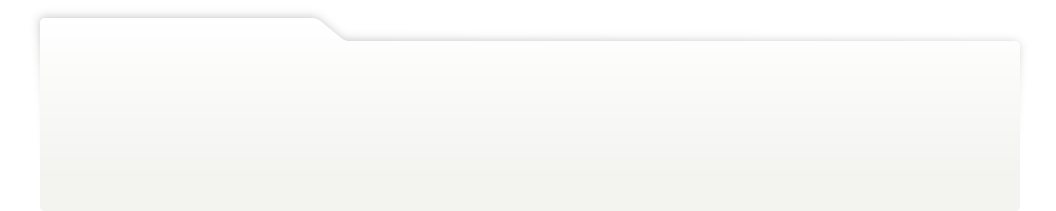
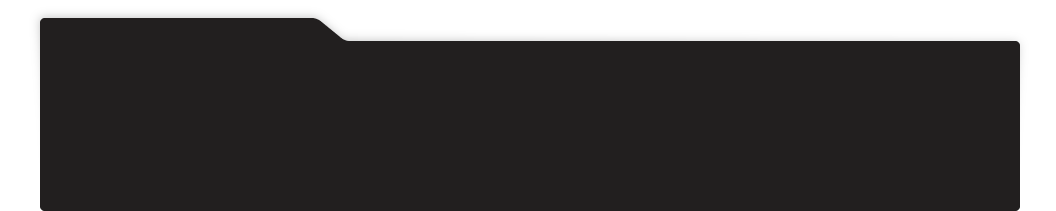
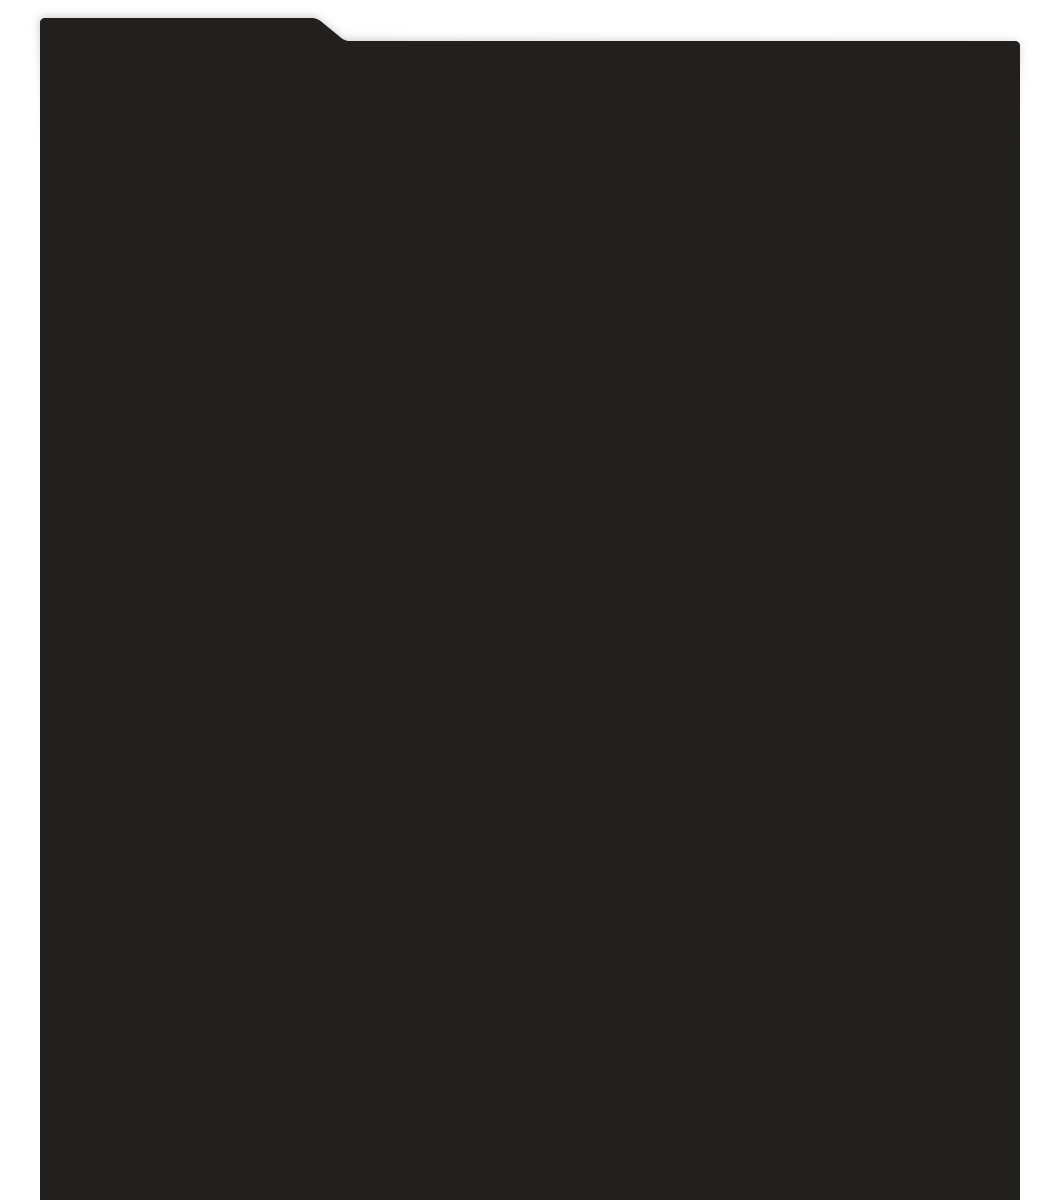
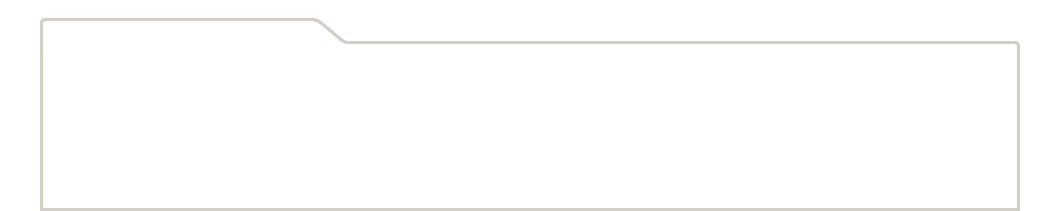
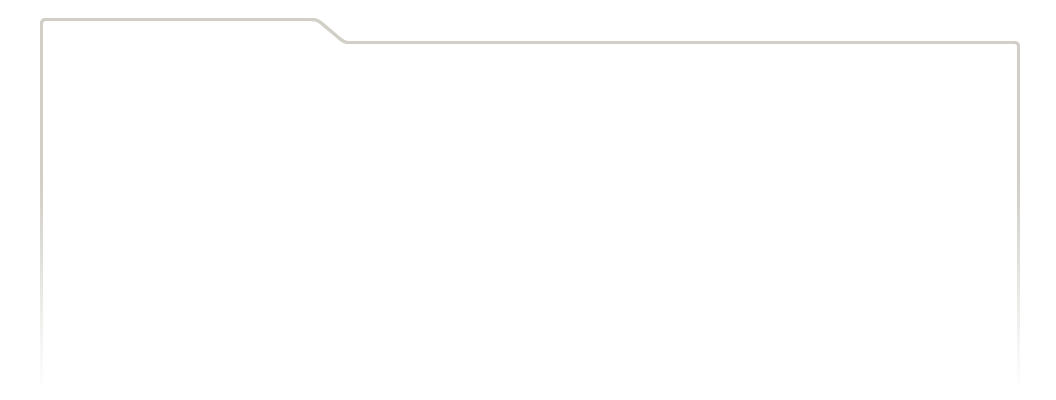
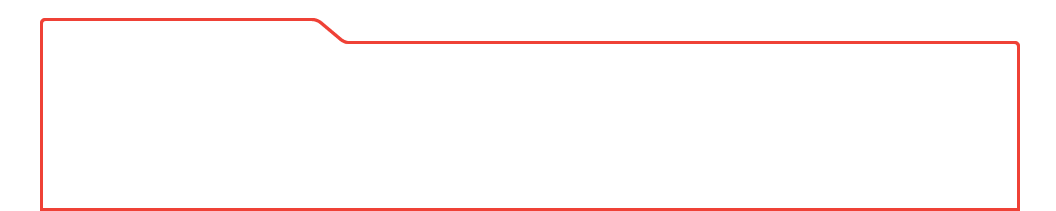
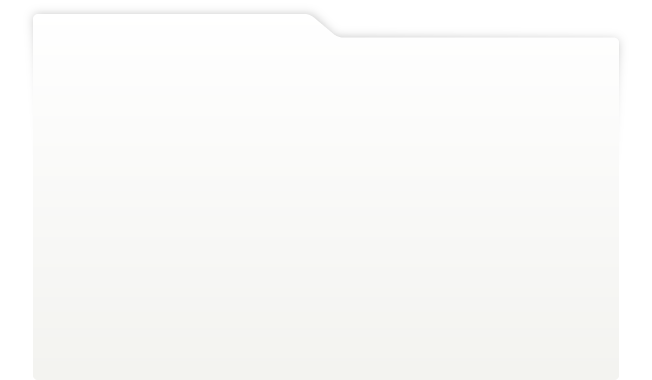
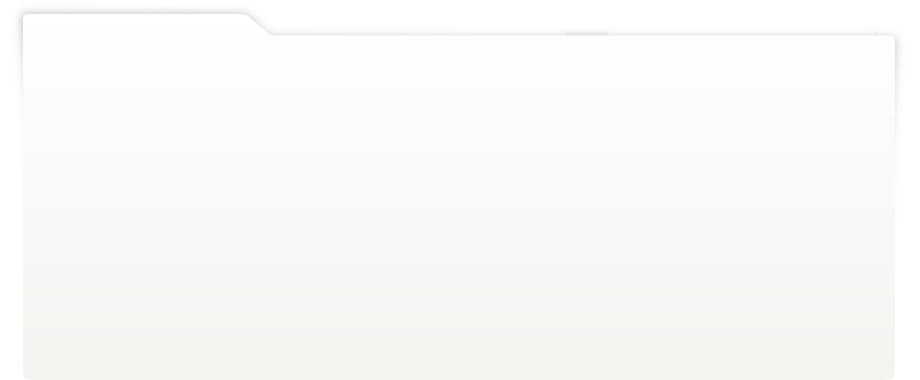
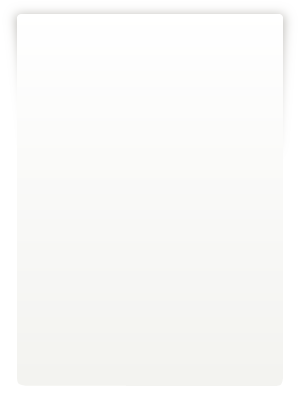
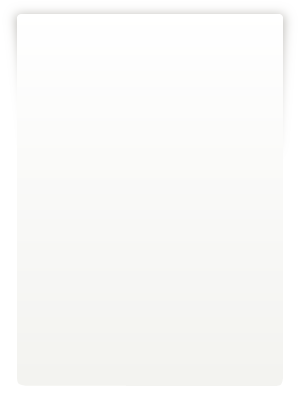
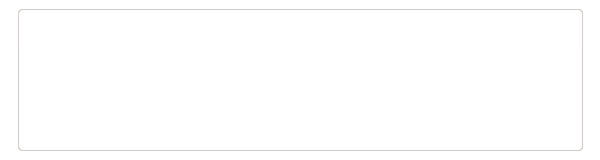
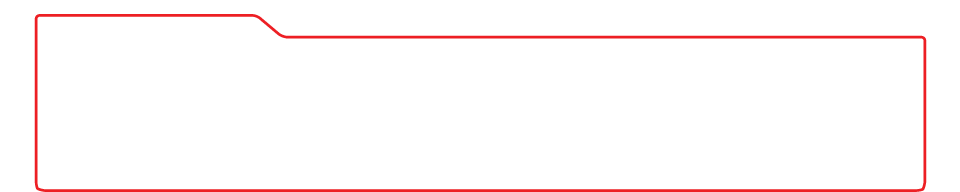
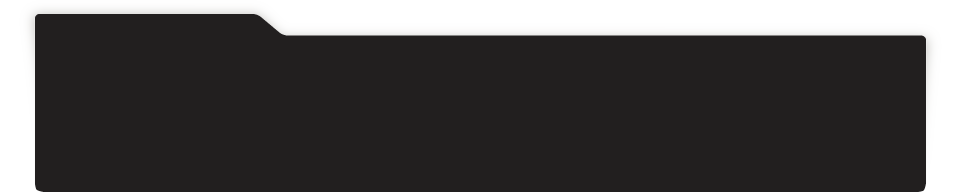
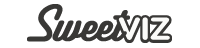
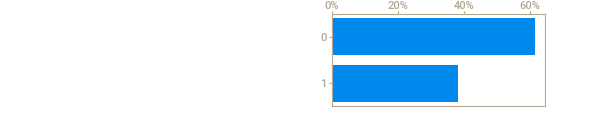
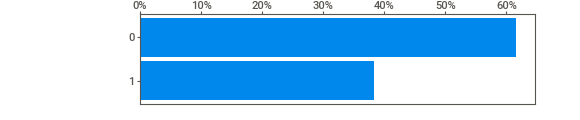
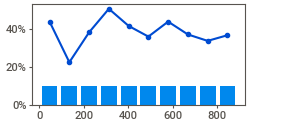
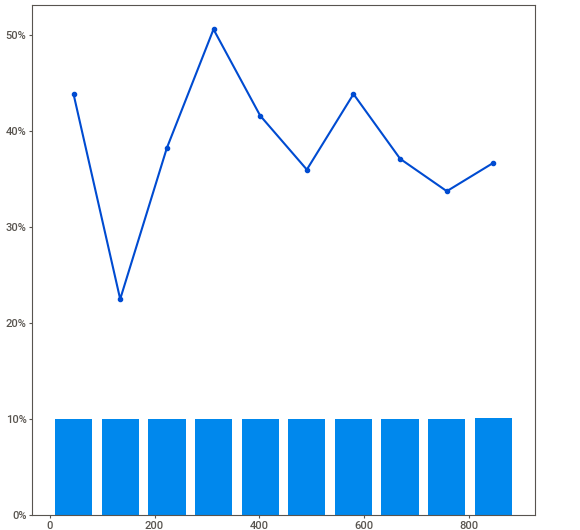
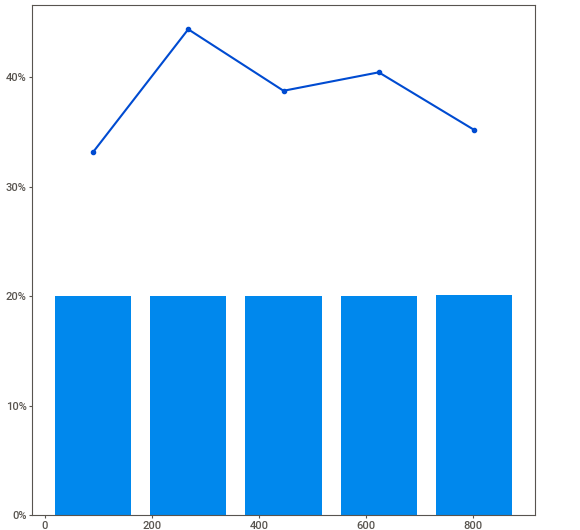
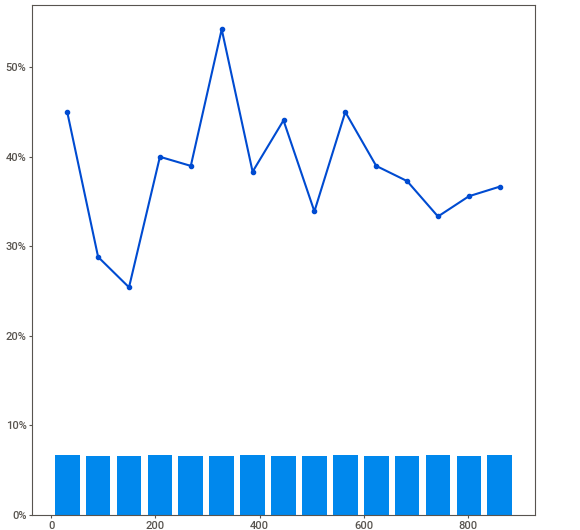
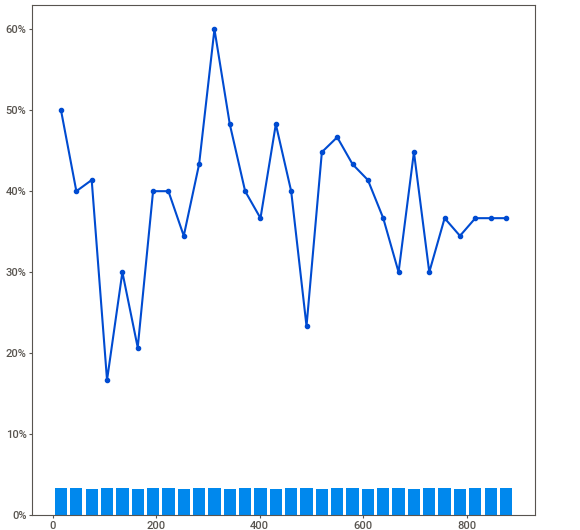
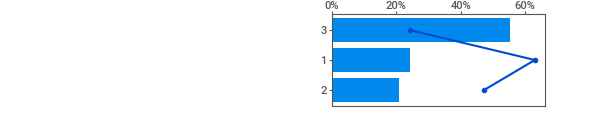
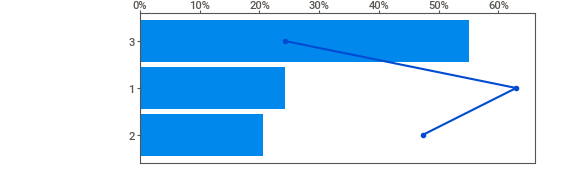
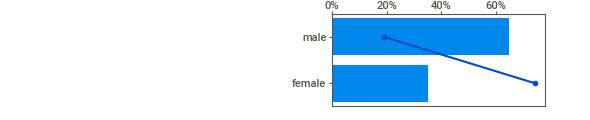
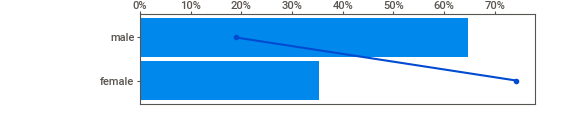
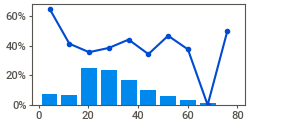
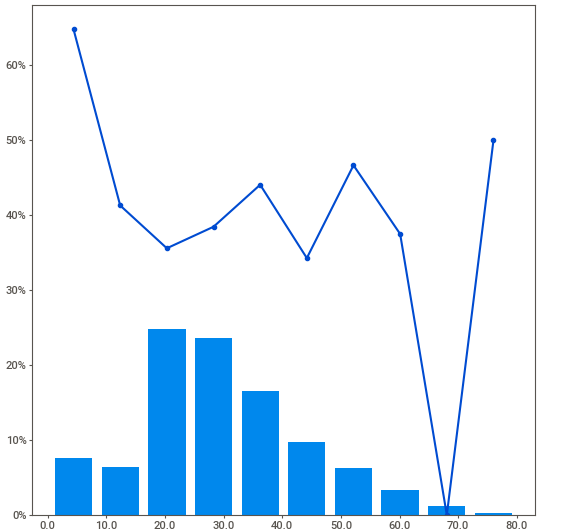
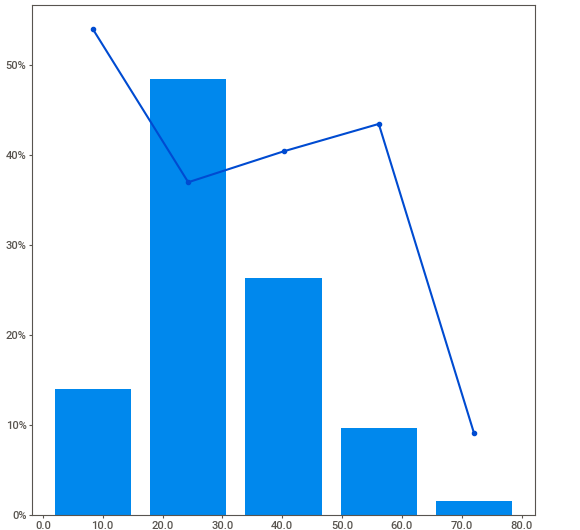
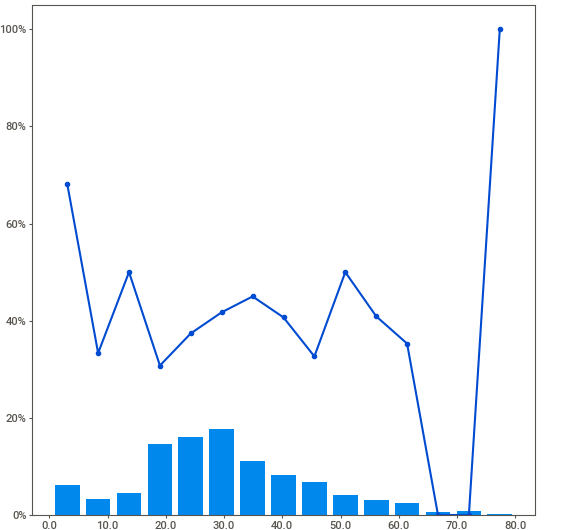
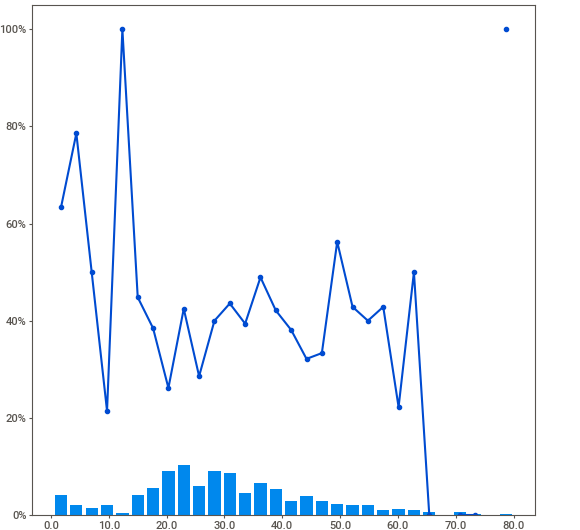
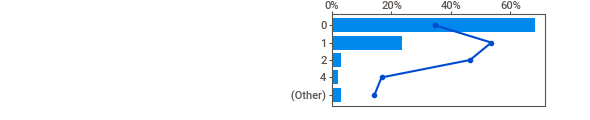
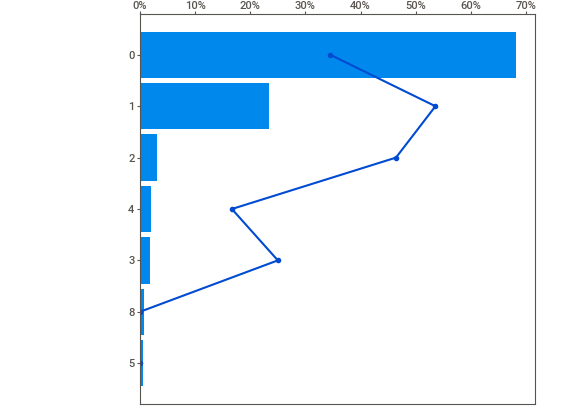
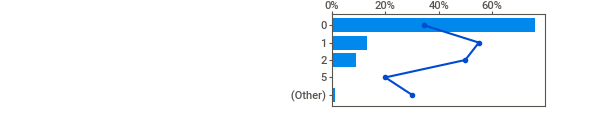
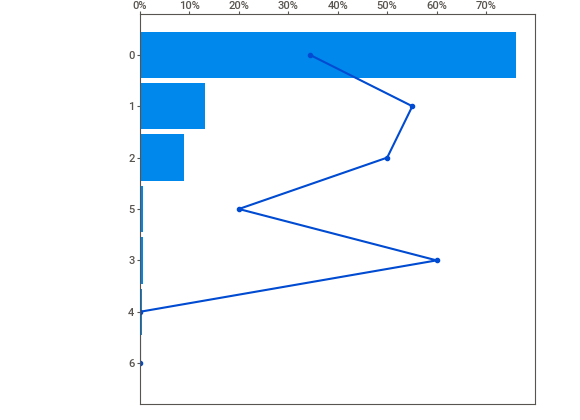
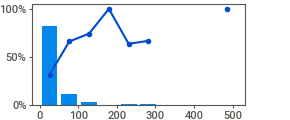
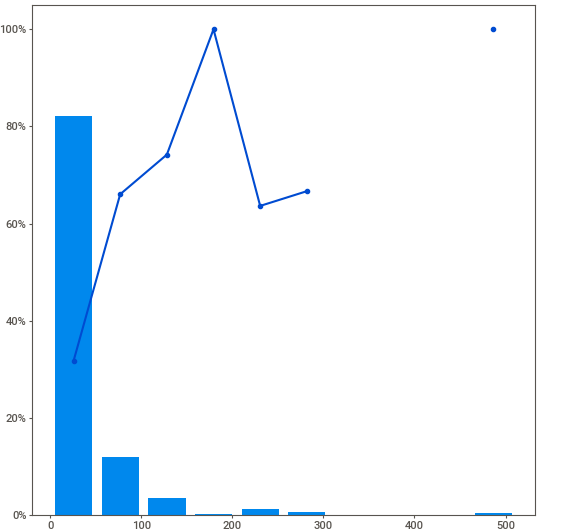
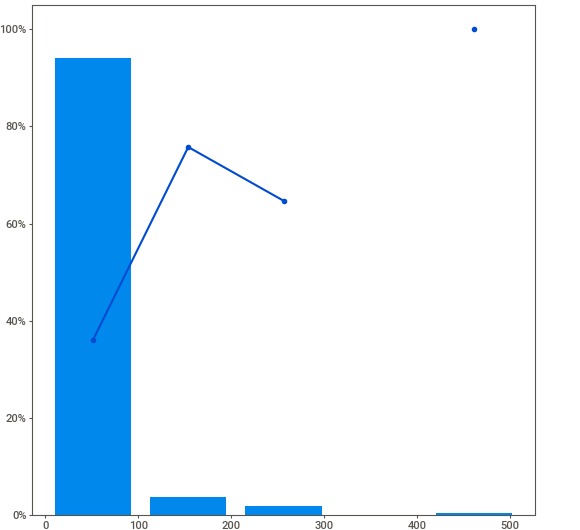
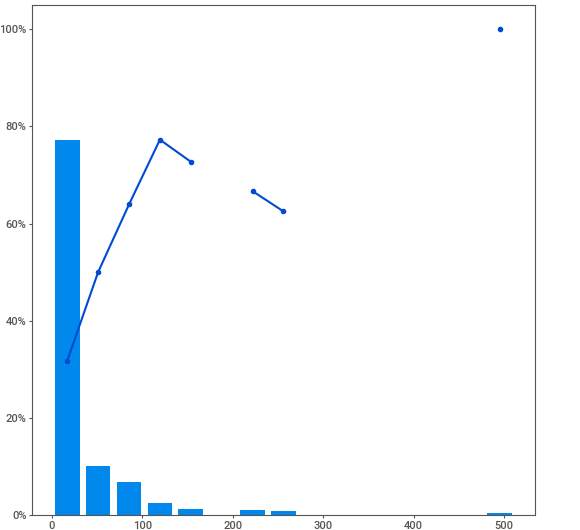
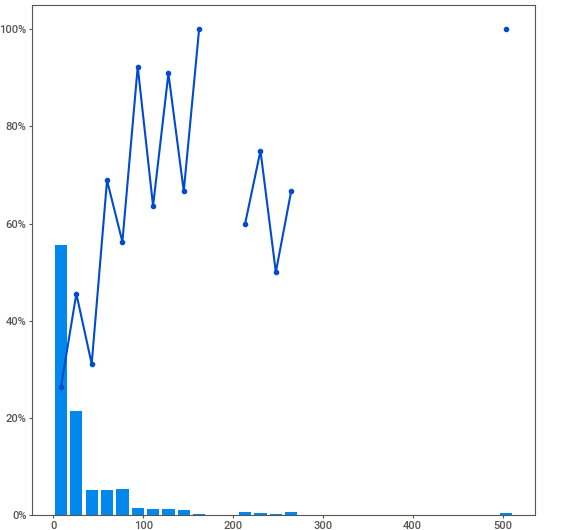
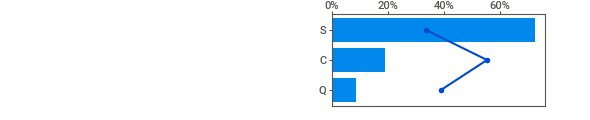
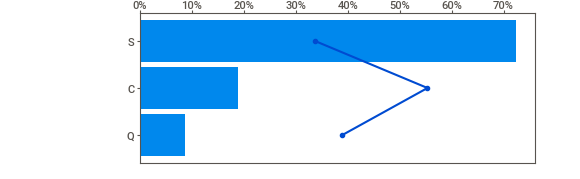
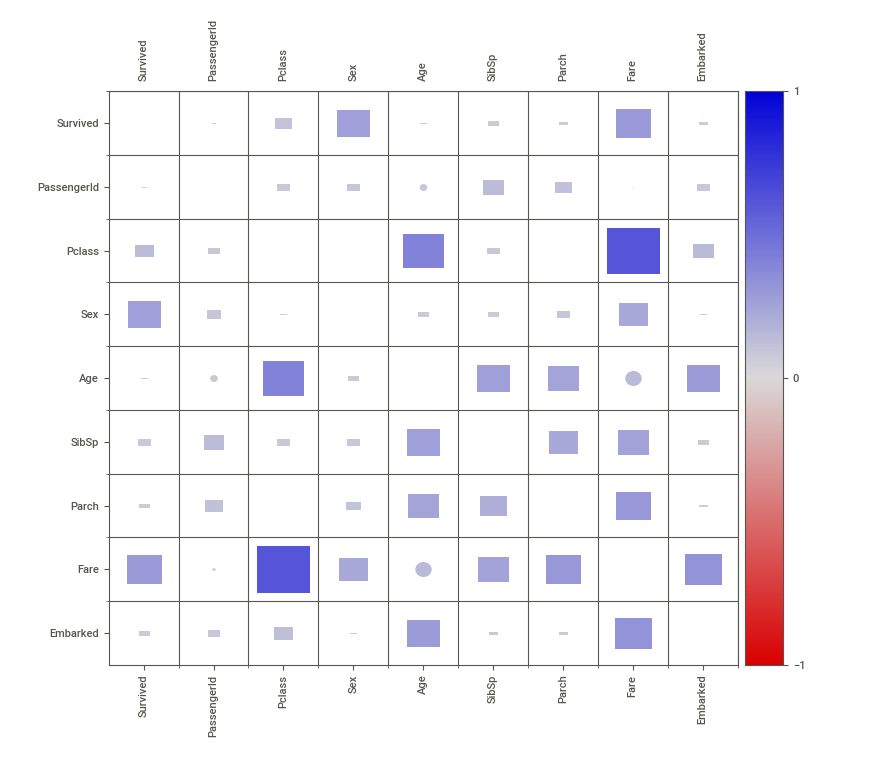
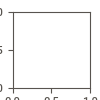

In [3]:
# Installing sweetviz

!pip install sweetviz 
import sweetviz as sv

# visualizing the exploratory analysis:

eda = sv.analyze(source = data, target_feat = 'Survived')
eda.show_notebook()

#### Preparing the Data:

##### Discard the Unnecessary Variables:

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True)

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


##### Check the Null Values:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [8]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
data.isnull().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

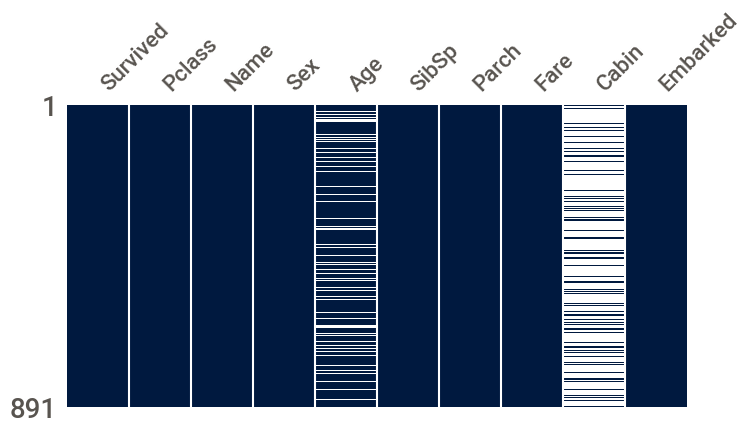

In [10]:
import missingno as missing
missing.matrix(data, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

###### Filling the NAs Cells:

In [11]:
# Age Variable:

mean_age = data['Age'].mean()
data['Age'] = data['Age'].fillna(mean_age)

In [12]:
# Embarked Variable:

mode_embarked = data['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(mode_embarked)

In [13]:
# Cabin Variable:

data.drop(['Cabin'], axis = 1, inplace=True)

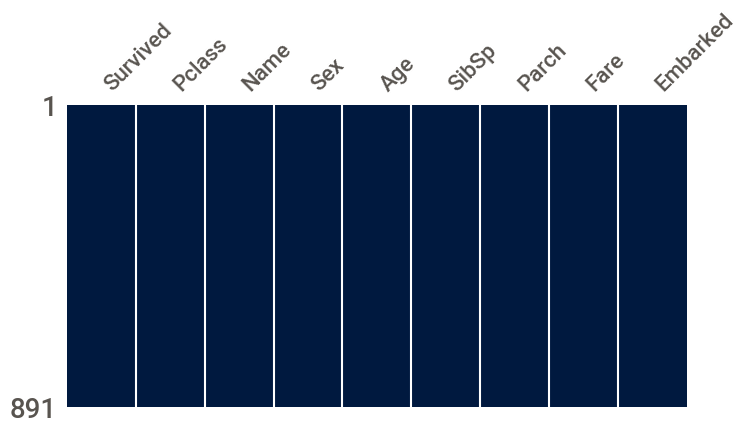

In [14]:
# Checking if there are columns with NAs after the modifications:

missing.matrix(data, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

##### Checking the Continuous Variables:

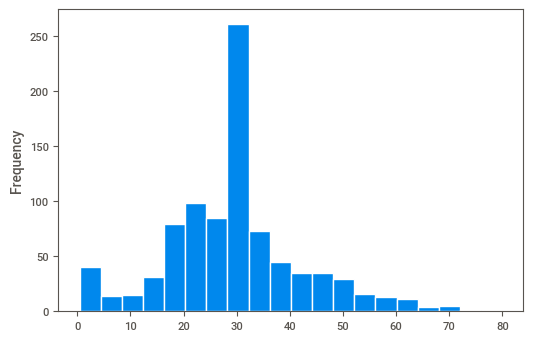

In [15]:
# Age:

data['Age'].plot(kind = 'hist', edgecolor = 'white', bins = 20)

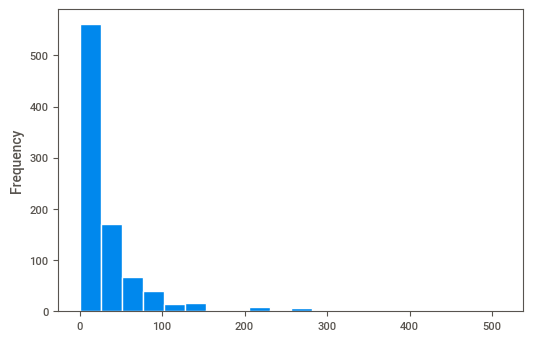

In [16]:
# Fare:

data['Fare'].plot(kind = 'hist', edgecolor = 'white', bins = 20)

##### Removing the Outliers:

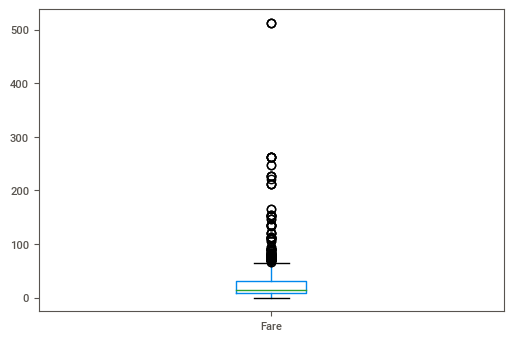

In [17]:
# Checking the outliers in the 'Fare' variable as we have seen above.

data['Fare'].plot(kind = 'box')

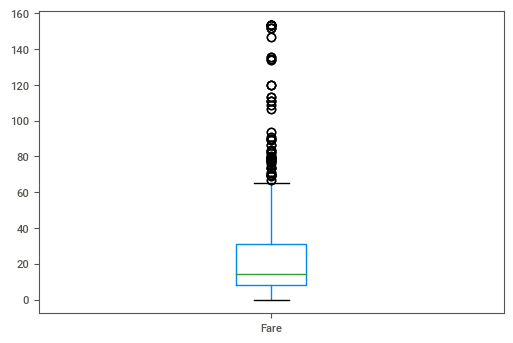

In [18]:
# Removing the outliers:

top = data['Fare'].quantile(0.975)

data.loc[data['Fare'] > top, 'Fare'] = top

data['Fare'].plot(kind = 'box');



##### Changing the Scale of Continuous Variables:

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

data[['Age', 'Fare']] = sc.fit_transform(data[['Age', 'Fare']])

In [20]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,-0.592481,1,0,-0.641274,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638789,1,0,1.216457,C
2,1,3,"Heikkinen, Miss. Laina",female,-0.284663,0,0,-0.621691,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407926,1,0,0.688924,S
4,0,3,"Allen, Mr. William Henry",male,0.407926,0,0,-0.618064,S
5,0,3,"Moran, Mr. James",male,0.000000,0,0,-0.606219,Q
6,0,1,"McCarthy, Mr. Timothy J",male,1.870059,0,0,0.653022,S
7,0,3,"Palsson, Master. Gosta Leonard",male,-2.131568,3,1,-0.240184,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,-0.207709,0,2,-0.528612,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,-1.208115,1,0,0.020802,C


##### Transforming Variables:

In [21]:
# Select the name's title

def aux(x):
    return x.split(', ')[1].split('. ')[0]

data['Title'] = data['Name'].apply(aux)

data.drop(['Name'], axis = 1, inplace = True)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,-0.592481,1,0,-0.641274,S,Mr
1,1,1,female,0.638789,1,0,1.216457,C,Mrs
2,1,3,female,-0.284663,0,0,-0.621691,S,Miss
3,1,1,female,0.407926,1,0,0.688924,S,Mrs
4,0,3,male,0.407926,0,0,-0.618064,S,Mr


In [22]:
# parch e sibsb Variables 

data['Family'] = data['SibSp'] + data['Parch'] + 1 

def aux(x):
    if x == 1:
        return 'Alone'
    elif x <= 4:
        return 'Little'
    else:
        return 'Big' 

data['Family_Type'] = data['Family'].apply(aux) 

data.drop(['Family', 'Parch', 'SibSp'], axis = 1, inplace = True)

data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_Type
0,0,3,male,-0.592481,-0.641274,S,Mr,Little
1,1,1,female,0.638789,1.216457,C,Mrs,Little
2,1,3,female,-0.284663,-0.621691,S,Miss,Alone
3,1,1,female,0.407926,0.688924,S,Mrs,Little
4,0,3,male,0.407926,-0.618064,S,Mr,Alone


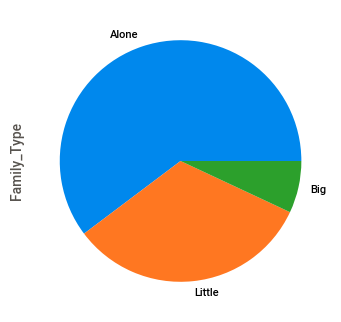

In [23]:
data['Family_Type'].value_counts().plot(kind = 'pie');

##### Grouping by Categories

In [24]:
data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Sir               1
Jonkheer          1
Ms                1
Don               1
Mme               1
the Countess      1
Lady              1
Capt              1
Name: Title, dtype: int64

In [25]:
def aux(x):
    if x in ['Mr', 'Miss', 'Mrs', 'Master']:
        return x
    else:
        return 'Other'

data['Title'] = data['Title'].apply(aux)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_Type
0,0,3,male,-0.592481,-0.641274,S,Mr,Little
1,1,1,female,0.638789,1.216457,C,Mrs,Little
2,1,3,female,-0.284663,-0.621691,S,Miss,Alone
3,1,1,female,0.407926,0.688924,S,Mrs,Little
4,0,3,male,0.407926,-0.618064,S,Mr,Alone


##### Define Variables as Dummies

In [26]:
variables_cat = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Type']

data = pd.get_dummies(data, columns = variables_cat, drop_first = True)

data.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Family_Type_Big,Family_Type_Little
0,0,-0.592481,-0.641274,0,1,1,0,1,0,1,0,0,0,1
1,1,0.638789,1.216457,0,0,0,0,0,0,0,1,0,0,1
2,1,-0.284663,-0.621691,0,1,0,0,1,1,0,0,0,0,0
3,1,0.407926,0.688924,0,0,0,0,1,0,0,1,0,0,1
4,0,0.407926,-0.618064,0,1,1,0,1,0,1,0,0,0,0


#### Variables Selection

##### Defining the most important variables by Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:

X = data.drop('Survived', axis = 1)
y = data['Survived']

model_base = RandomForestClassifier(max_depth = 3) 
model_base.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
model_base.feature_importances_

array([0.03607608, 0.08318438, 0.00743006, 0.09525647, 0.29525669,
       0.00300528, 0.01122427, 0.09490466, 0.21855774, 0.07995185,
       0.00293938, 0.0353958 , 0.03681734])

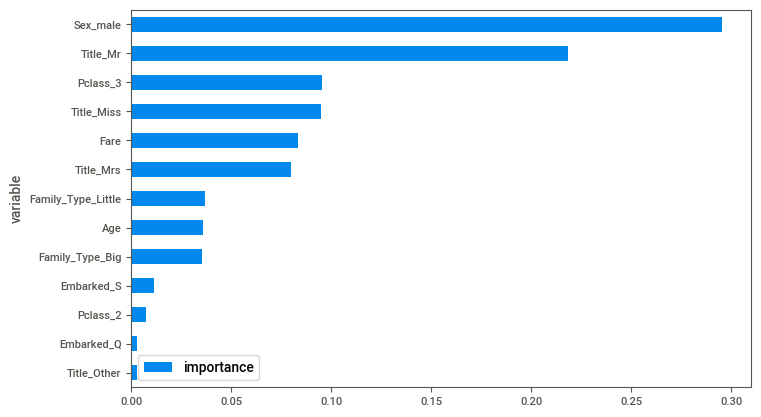

In [30]:
variables = pd.DataFrame()
variables['variable'] = X.columns
variables['importance'] = model_base.feature_importances_
variables.sort_values(by = 'importance', ascending = True, inplace = True)
variables.set_index('variable', inplace = True)
variables.plot(kind='barh', figsize=(8, 5));

##### Selecting the Most Important Variables with SelectFromModel, scikit-learn


In [31]:
import numpy as np
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(model_base, prefit = True, max_features = 6, threshold = -np.inf)
X6 = selector.transform(X)
print(X6.shape) 

selector = SelectFromModel(model_base, prefit = True, max_features = 8, threshold = -np.inf)
X8 = selector.transform(X)
print(X8.shape)

(891, 6)
(891, 8)


In [32]:
X.shape

(891, 13)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [34]:
def MachineLearning(X,y):

    #X = data.drop('Exited', axis = 1)
    #y = data['Exited']

    list_measures = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
    name_measures = ['accuracy', 'sensitivity', 'precision', 'balanced_accuracy', 'f1-score']

    list_models = [LogisticRegression(),
                            DecisionTreeClassifier(max_depth = 3),
                            DecisionTreeClassifier(max_depth = 5),
                            DecisionTreeClassifier(max_depth = 7),
                            KNeighborsClassifier(n_neighbors = 5),
                            KNeighborsClassifier(n_neighbors = 15),
                            KNeighborsClassifier(n_neighbors = 25),
                            BaggingClassifier(),
                            RandomForestClassifier(n_estimators=50, max_depth = 5),
                            RandomForestClassifier(n_estimators=50, max_depth = 7),
                            RandomForestClassifier(n_estimators=100, max_depth = 5),
                            RandomForestClassifier(n_estimators=100, max_depth = 7)]

    name_models = ['Logistic Regression',
                            'Tree (depth = 3)',
                            'Tree (depth = 5)',
                            'Tree (depth = 7)',
                            '5-NN',
                            '15-NN',
                            '25-NN',
                            'Bagging',
                            'Random Forest (trees = 50, depth = 5)',
                            'Random Forest (trees = 50, depth = 7)',
                            'Random Forest (trees= 100, depth = 5)', 
                            'Random Forest (trees = 100, depth = 7)']

    results0 = {}

    validation = StratifiedKFold(n_splits = 10)


    for i in range(len(list_models)):
        print('Running the model: ' + name_models[i])
        accs_vc = cross_validate(list_models[i], X, y, cv = validation, scoring = list_measures)

        acc = accs_vc['test_accuracy'].mean()
        sen = accs_vc['test_recall'].mean()
        vpp = accs_vc['test_precision'].mean()
        bac = accs_vc['test_balanced_accuracy'].mean()
        f1s = accs_vc['test_f1'].mean()

        results0[name_models[i]] = [acc, sen, vpp, f1s, bac]
        
    results = pd.DataFrame(results0, index = name_measures).T

    return results

In [49]:
MachineLearning(X, y)

Running the model: Logistic Regression
Running the model: Tree (depth = 3)
Running the model: Tree (depth = 5)
Running the model: Tree (depth = 7)
Running the model: 5-NN
Running the model: 15-NN
Running the model: 25-NN
Running the model: Bagging
Running the model: Random Forest (trees = 50, depth = 5)
Running the model: Random Forest (trees = 50, depth = 7)
Running the model: Random Forest (trees= 100, depth = 5)
Running the model: Random Forest (trees = 100, depth = 7)


,accuracy,sensitivity,precision,balanced_accuracy,f1-score
Logistic Regression,0.826055,0.745462,0.790371,0.763850,0.810795
Tree (depth = 3),0.830524,0.760084,0.790659,0.771164,0.817214
Tree (depth = 5),0.814894,0.696555,0.793826,0.735215,0.792705
Tree (depth = 7),0.814869,0.716723,0.783099,0.745209,0.796408
5-NN,0.826092,0.725294,0.804621,0.760186,0.807092
15-NN,0.824981,0.728235,0.802514,0.758742,0.806744
25-NN,0.813745,0.681176,0.805040,0.733682,0.788686
Bagging,0.816005,0.704706,0.799719,0.745304,0.794979
"Random Forest (trees = 50, depth = 5)",0.832784,0.710420,0.829013,0.760602,0.809655
"Random Forest (trees = 50, depth = 7)",0.830562,0.698739,0.833925,0.755410,0.805616


#### Hyperparameter Tuning

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [37]:
np.arange(1, 50, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [38]:
model = KNeighborsClassifier()
        
validation = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

parameters = { 'n_neighbors' : np.arange(1, 100, 1) }

grid_search = GridSearchCV(model, param_grid = parameters,
                                   scoring = 'accuracy', 
                                   cv = validation, 
                                   verbose = 1,
                                   n_jobs = -1)

grid_search.fit(X, y)

Fitting 30 folds for each of 99 candidates, totalling 2970 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 2970 out of 2970 | elapsed:   24.0s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             pre

In [39]:

grid_search.best_score_

0.8268580940491053

In [40]:
grid_search.cv_results_['mean_test_score']

array([0.76812318, 0.78493966, 0.80518102, 0.81225968, 0.82197253,
       0.82607158, 0.82685809, 0.82308365, 0.82084894, 0.82084062,
       0.81785268, 0.81972118, 0.82158136, 0.82233874, 0.82645859,
       0.82309197, 0.8245901 , 0.82570953, 0.82046608, 0.82047025,
       0.81598002, 0.81858926, 0.81297961, 0.81223887, 0.81073242,
       0.81259675, 0.81072826, 0.81185185, 0.81036205, 0.81186434,
       0.81223471, 0.813737  , 0.8141032 , 0.81709946, 0.81523096,
       0.81672493, 0.81598002, 0.81709946, 0.81597586, 0.81485643,
       0.81111111, 0.81148564, 0.80924261, 0.80961715, 0.80587599,
       0.80736995, 0.80737412, 0.80774865, 0.80475239, 0.80661673,
       0.8058635 , 0.80474823, 0.8051186 , 0.80699126, 0.80736579,
       0.80699126, 0.80586767, 0.8062422 , 0.80773616, 0.80773616,
       0.80885976, 0.80811486, 0.80848523, 0.80848939, 0.80773616,
       0.80699126, 0.80661257, 0.8062422 , 0.80362047, 0.80548897,
       0.80473991, 0.80325427, 0.80250104, 0.80138161, 0.80212

In [41]:

random_search = RandomizedSearchCV(model, param_distributions = parameters,
                                   scoring = 'accuracy', 
                                   cv = validation, 
                                   verbose = 1,
                                   n_iter = 10,
                                   n_jobs = -1)

random_search.fit(X, y)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.3s finished


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
                   error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9,...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,

In [42]:
random_search.cv_results_['mean_test_score']

array([0.78828548, 0.81332917, 0.81446109, 0.81109863, 0.80511028,
       0.81183104, 0.80621723, 0.81932168, 0.79274241, 0.823067  ])

In [43]:
random_search.best_score_

0.8230669995838534

In [44]:
def Tuning(model, training, targets, parameters, t = 'grid'):
 
    validation = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1)

    if t == 'grid':
        search = GridSearchCV(model, param_grid = parameters,
                                  scoring = 'accuracy', cv = validation, 
                                  verbose = 1, n_jobs = -1)
    elif t == 'random':
        search = RandomizedSearchCV(model, param_distributions = parameters,
                                scoring = 'accuracy', cv = validation,
                                n_iter = 50, verbose = 1, n_jobs = -1)
    else:
        print('Invalid input in the "type" argument')


    search.fit(training, targets) 

    b = search.best_estimator_

    print('\nAccuracy: {:.4f}'.format(search.best_score_))
    print('Best Parameters: {}\n'.format(search.best_params_))

    return b

In [45]:
parameters = {   
                 'n_neighbors' : np.arange(1, 50, 2)
                 }
model = KNeighborsClassifier()

knn = Tuning(model, X, y, parameters, t = 'grid')

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



Accuracy: 0.8238
Best Parameters: {'n_neighbors': 7}



[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    2.0s finished


In [46]:
parameters = {   
              'max_depth' : np.arange(1,11), 
              'min_samples_split': np.arange(2,12),
              'min_samples_leaf': np.arange(1,11),
                 }

model = DecisionTreeClassifier()

tree = Tuning(model, X, y, parameters, t = 'grid')
tree

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   17.4s



Accuracy: 0.8362
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 11}



[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:   31.4s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
parameters = {   
                 'max_depth' : [2, 4, 6, 8, 10],
                 'n_estimators': [50, 100, 150],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 3, 5],
                 'bootstrap': [True, False]
                 }

model = RandomForestClassifier()

rf = Tuning(model, X, y, parameters, t = 'random')
rf

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   50.8s



Accuracy: 0.8395
Best Parameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 6, 'bootstrap': False}



[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
model.fit(X, y)
data['Survival_Predicted'] = model.predict(X)

                                             |          | [  0%]   00:00 -> (? left)


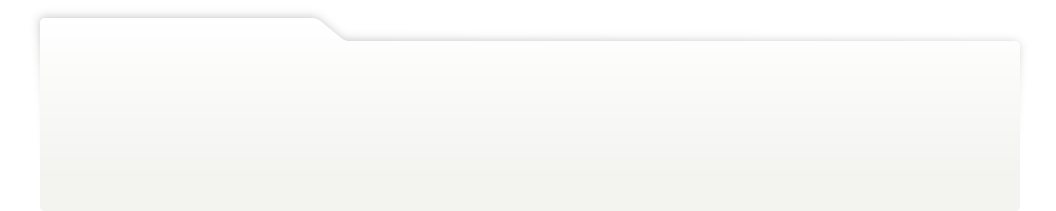
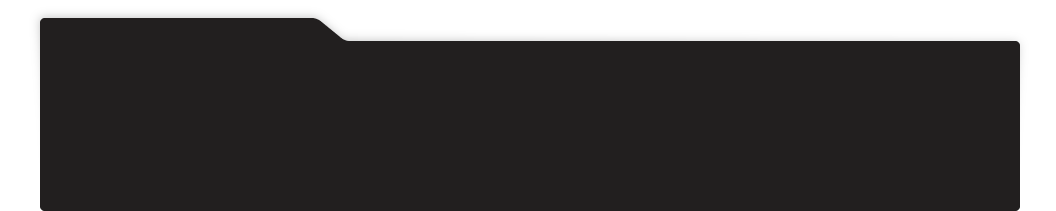
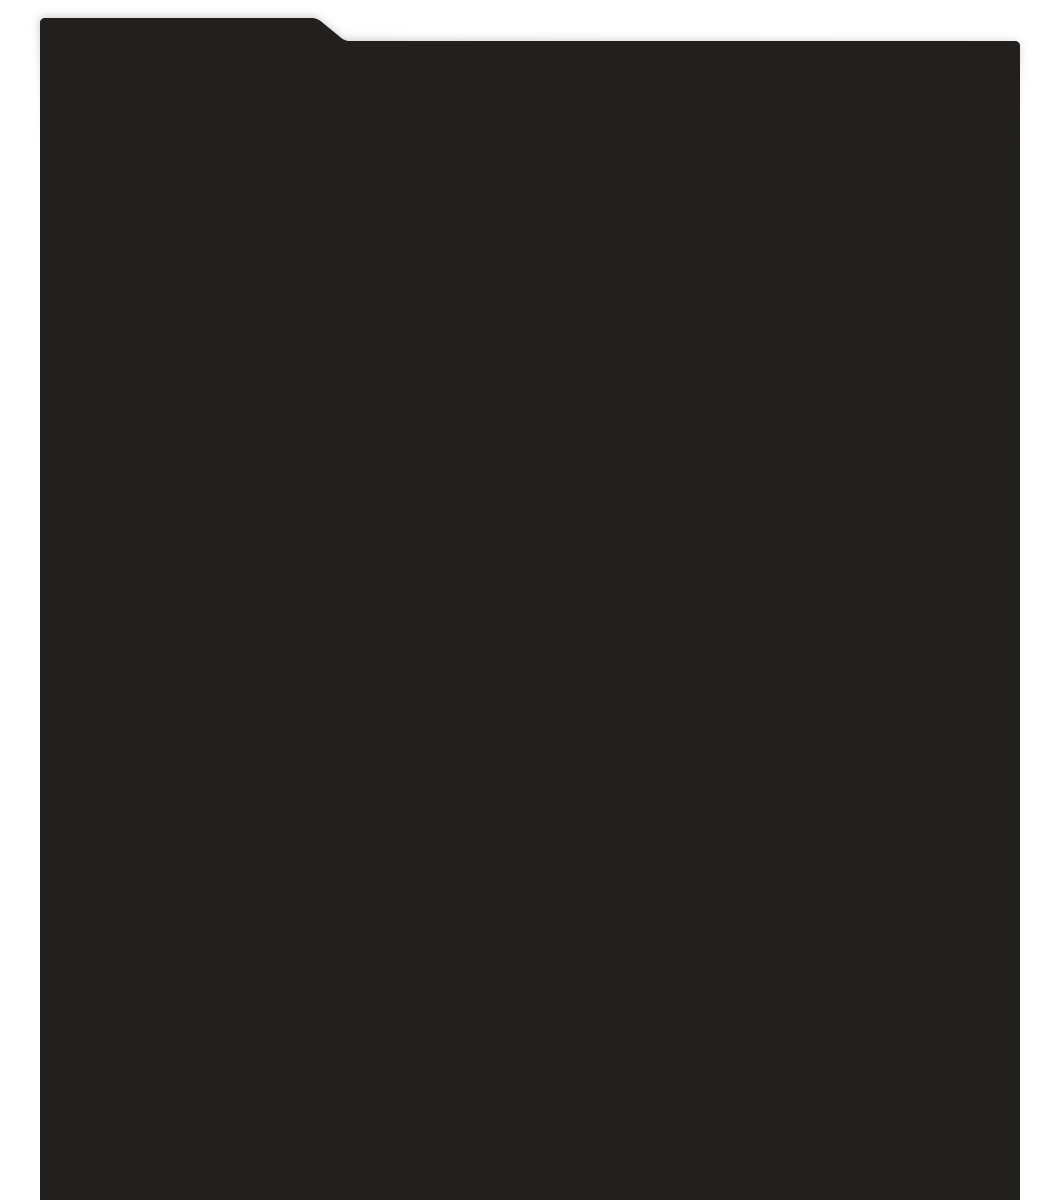
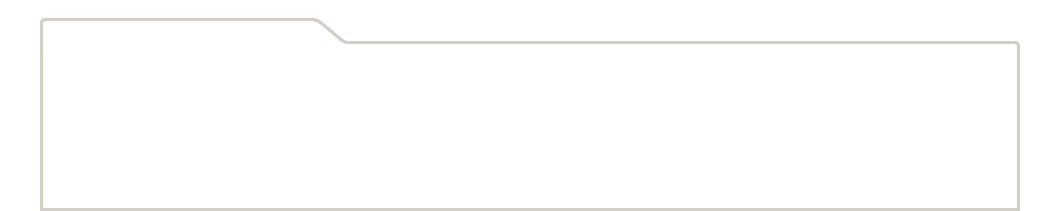
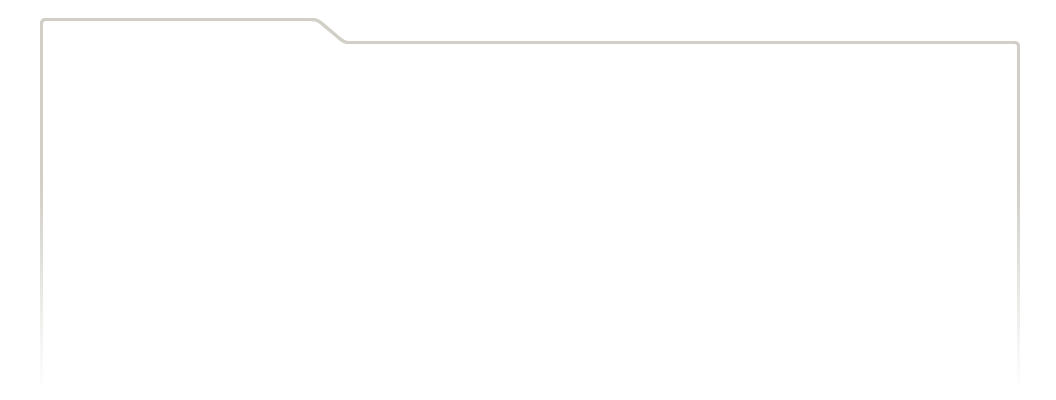
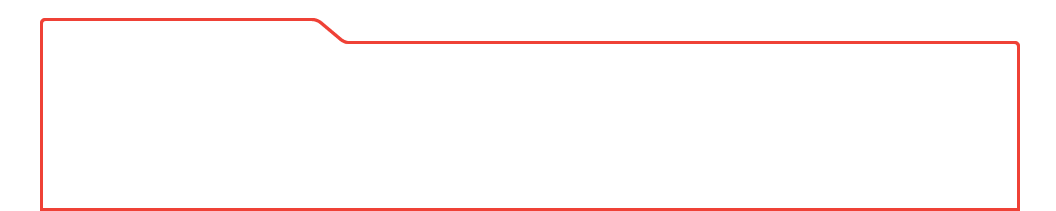
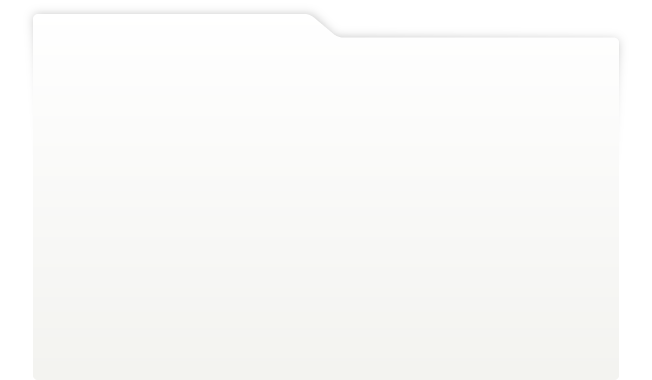
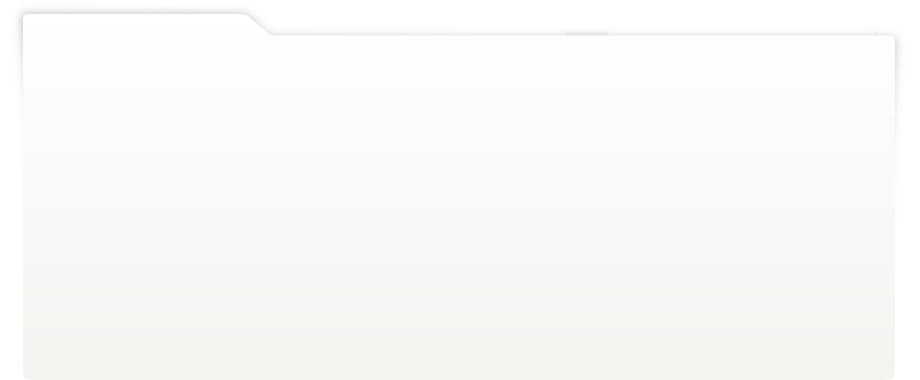
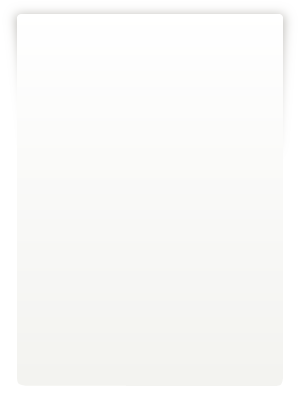
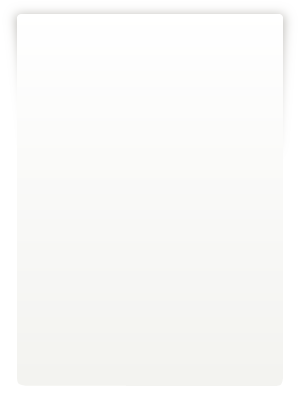
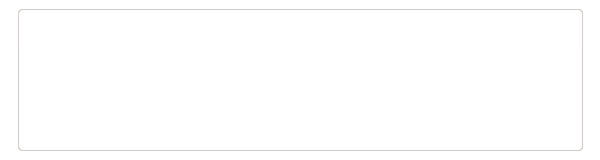
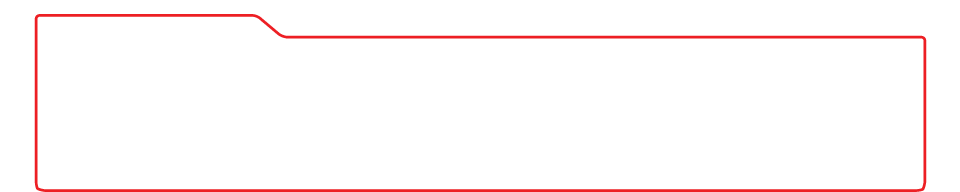
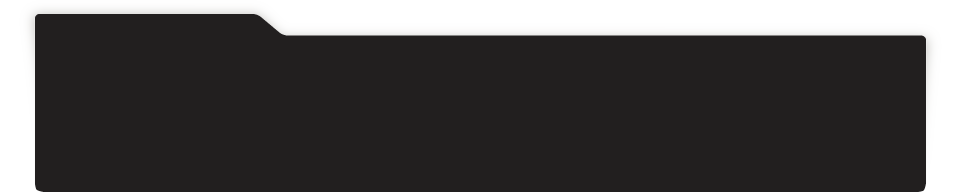
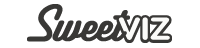
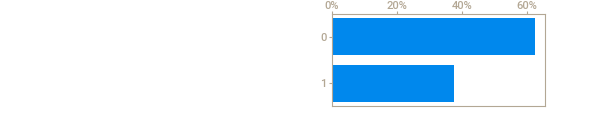
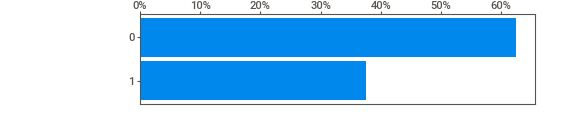
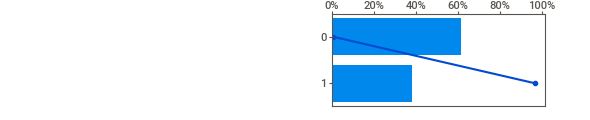
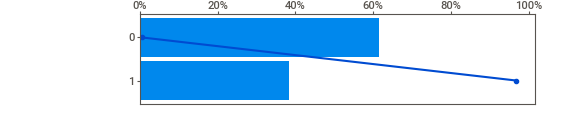
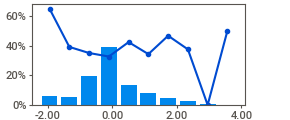
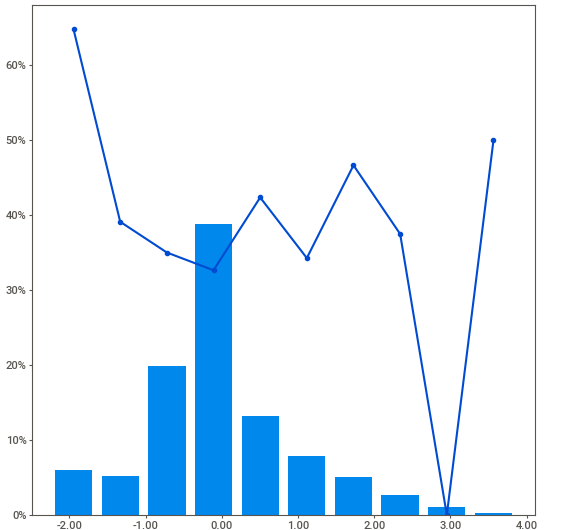
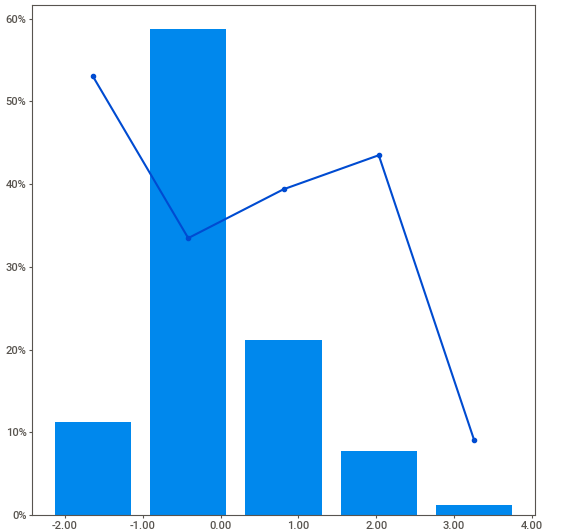
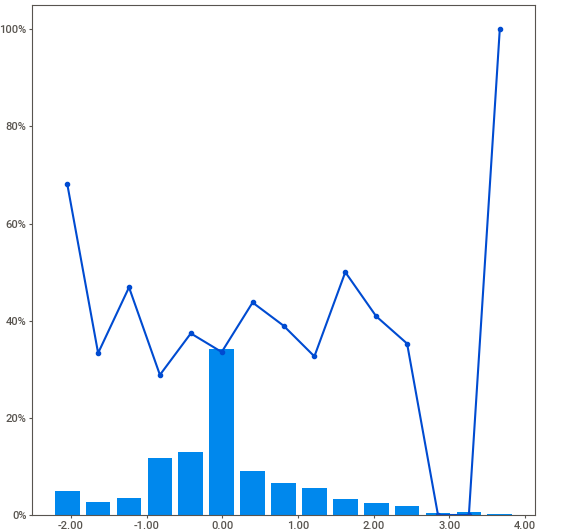
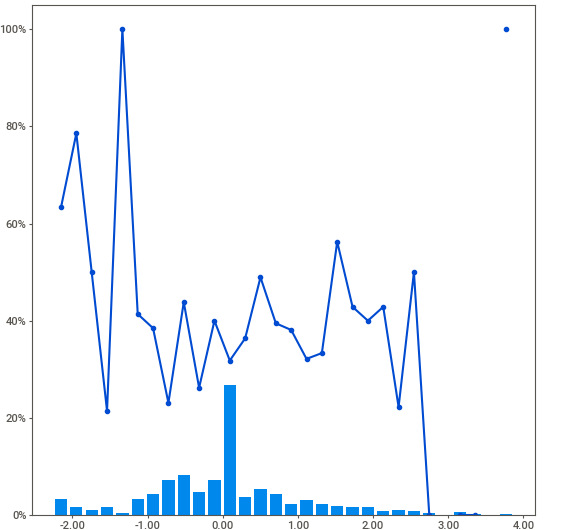
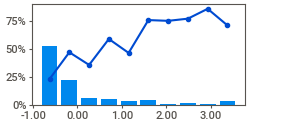
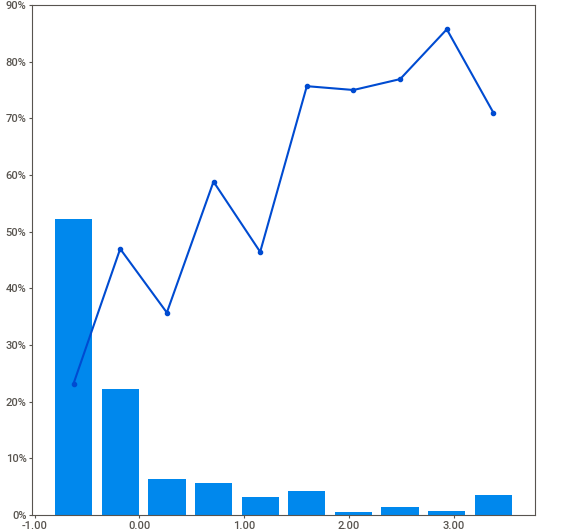
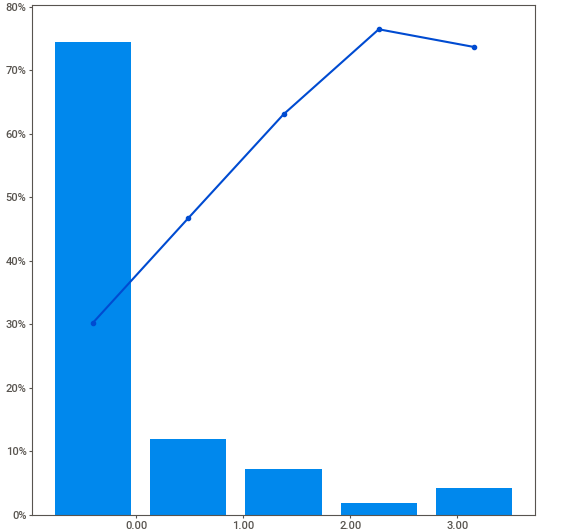
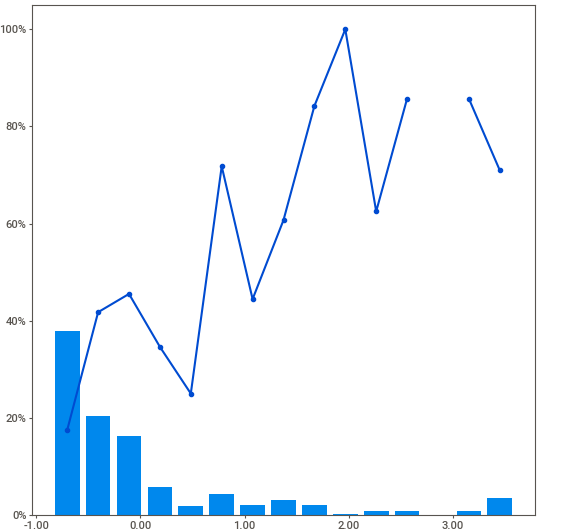
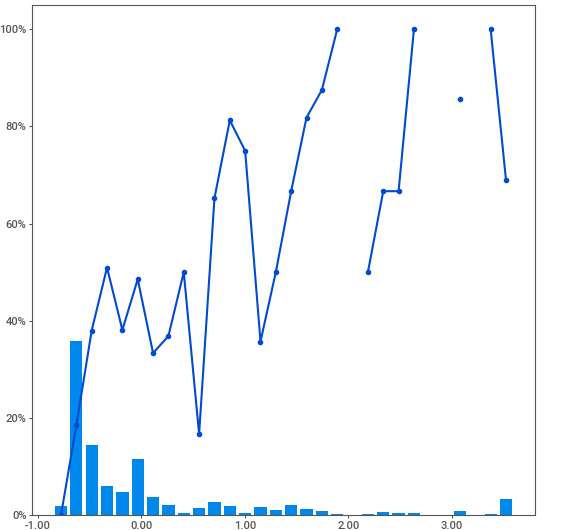
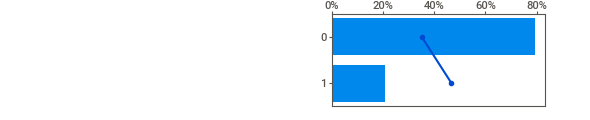
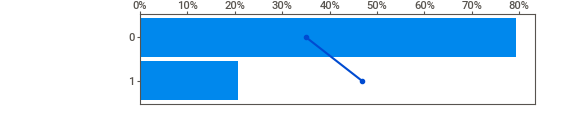
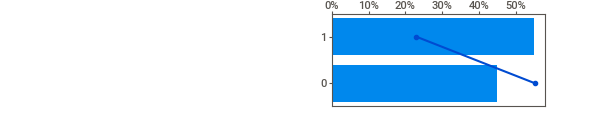
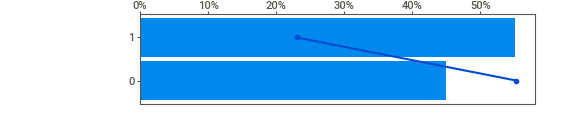
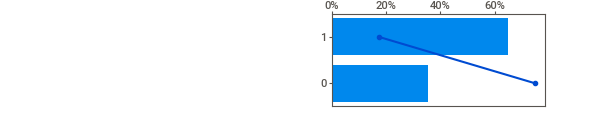
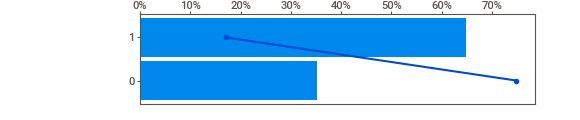
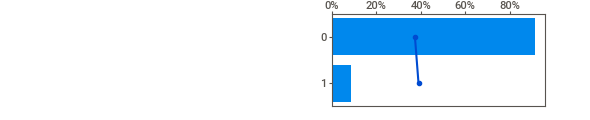
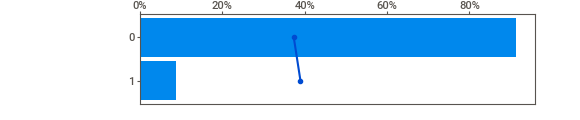
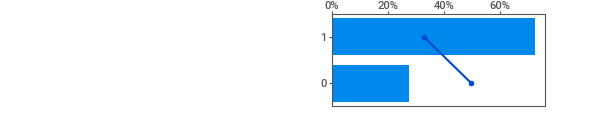
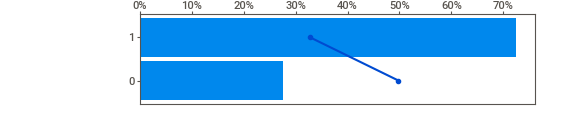
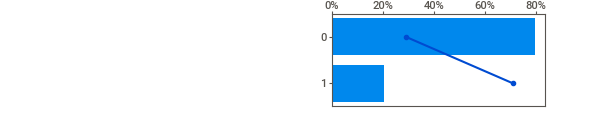
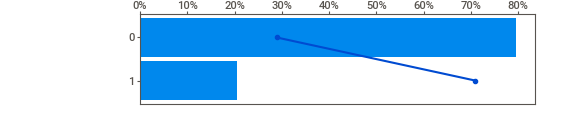
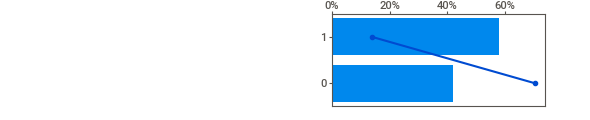
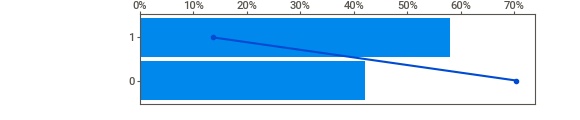
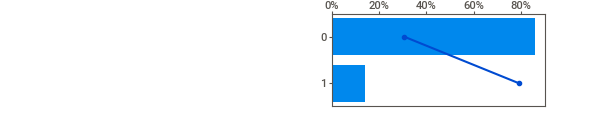
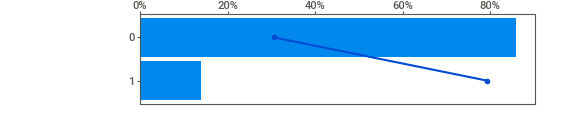
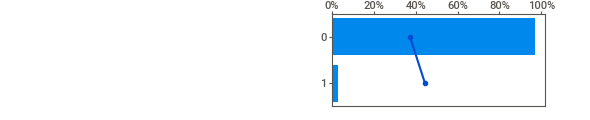
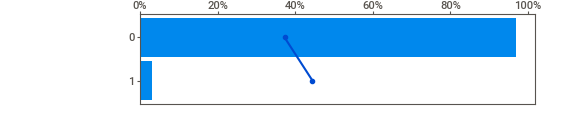
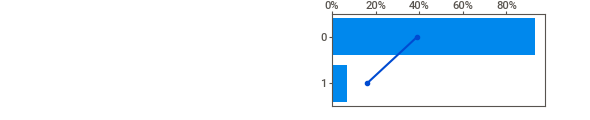
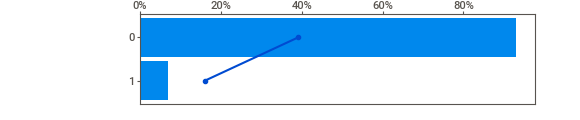
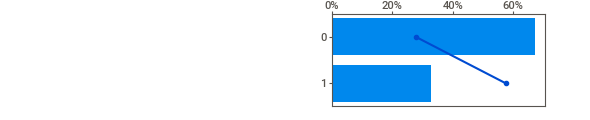
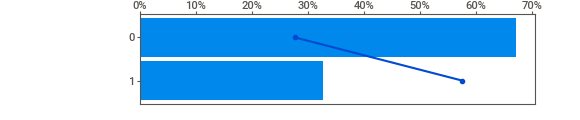
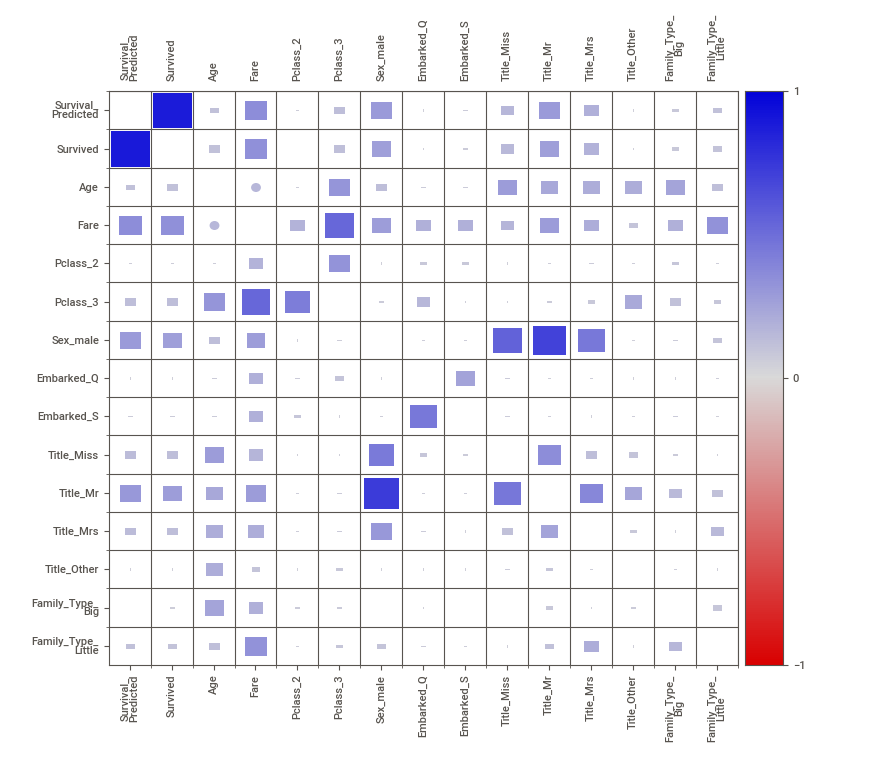
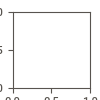

In [55]:

eda = sv.analyze(source = data, target_feat = 'Survival_Predicted')
eda.show_notebook()

### Conclusion

Briefly, it's possible to verify that women, children, the most elderly, and passengers that have bought the expensive fares were more likely to survive in the Titanic accident.